In [1]:
#!pip install geopandas

In [2]:
#!pip install descartes

In [3]:
#!pip install pyogrio

In [4]:
#!pip install fiona

In [34]:
#!pip install contextily

In [38]:
#!pip install opencage

In [39]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from tqdm import tqdm
from geopy.geocoders import Nominatim
from time import sleep
from geopy.geocoders import OpenCage
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import contextily as ctx
from opencage.geocoder import OpenCageGeocode

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [6]:
scSample = pd.read_csv('/Users/aarohigoel/Documents/JuneSCIntern/sample_data_loc2018.csv')

In [7]:
scSample.head()

,ano,tway,typ,day,rai,loa,odr,alc,wcc,ahc,rsc,hel,xwk,dat,als,jur,fat,inj,acd,bir,bra,sic,sra,alsb,alss,hzd,bus,trm,tow,lat,lon,jct,ocf1,ocf2,ocf3,ocf4,ibus,wzn,wzt,wzl,wpr,bno,tct,unt,cty,rtn,brn,srn,fhe,prc,tim,bdo,pnt,pat,rct,adid,dlr
0,18597878,1,L,5,0.0,1.0,S,1,1,1,1,5,2,21384.0,FORT PRINCE BLVD,4213,0.0,1.0,NaN,4,0.0,4,0.0,BOBO RD,SIMMONS ST,NaN,NaN,NaN,NaN,34575792,82063409,4,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,4882,41,2,42,129.0,736.0,2642.0,22,5,1018,1,1023,1028,3,NO,S
1,18501881,3,L,5,0.0,3.0,N,1,1,1,5,5,2,21188.0,BEES FERRY RD,1001,0.0,0.0,NaN,5,0.0,5,0.0,WEST ASHLEY CIR,GLENN MCCONNELL PKWY,NaN,NaN,NaN,NaN,32493058,80045819,4,1.0,NaN,NaN,NaN,3,2,NaN,NaN,NaN,7152,1,2,10,57.0,NaN,NaN,22,3,1400,0,1413,1420,4,NO,S
2,18567581,1,L,3,0.0,2.0,N,1,1,1,1,5,2,21326.0,W RICHARDSON AVE,1802,0.0,0.0,NaN,4,0.0,2,2.0,S CEDAR ST,S MAIN ST,NaN,NaN,NaN,NaN,33010998,80103666,13,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,6399,98,2,18,65.0,13.0,17.0,25,2,1015,5,1015,1017,4,NO,S
3,18002783,8,L,3,0.0,0.0,E,1,1,1,1,5,9,21263.0,BATTELGROUND,4207,0.0,1.0,NaN,2,0.0,4,0.0,N MAIN STREET,CEMETARY STREET,NaN,NaN,1.0,1.0,0,0,13,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,6700,98,2,42,110.0,29.0,566.0,22,28,1725,1,1725,1727,3,NO,W
4,18548511,3,L,6,0.0,1.0,S,1,1,1,1,5,2,21287.0,INTERSTATE 85,HP03,0.0,0.0,NaN,3,7.0,3,0.0,NaN,FORT PRINCE BLVD,NaN,NaN,NaN,NaN,34574774,82022944,13,NaN,NaN,NaN,NaN,3,1,4.0,3.0,2.0,0329,44,2,42,85.0,85.0,129.0,22,18,1525,10,1530,1612,1,NO,N


In [8]:
scSample[['als','cty']]

,als,cty
0,FORT PRINCE BLVD,42
1,BEES FERRY RD,10
2,W RICHARDSON AVE,18
3,BATTELGROUND,42
4,INTERSTATE 85,42
5,NaN,17
6,LONGCREEK DR,40
7,GERVAIS ST,40
8,RUTLEDGE AVE,10
9,HUNTER RD,23


In [9]:
scSample.isnull().sum()

ano      0
tway     0
typ      0
day      0
rai      0
loa      9
odr      0
alc      0
wcc      0
ahc      0
rsc      0
hel      0
xwk      0
dat      0
als      5
jur      0
fat      0
inj      0
acd     44
bir      0
bra      0
sic      0
sra      0
alsb     3
alss     3
hzd     50
bus     50
trm     47
tow     46
lat      0
lon      0
jct      0
ocf1    39
ocf2    47
ocf3    49
ocf4    50
ibus     0
wzn      0
wzt     49
wzl     49
wpr     49
bno      0
tct      0
unt      0
cty      0
rtn      6
brn     17
srn     15
fhe      0
prc      0
tim      0
bdo      0
pnt      0
pat      0
rct      0
adid     0
dlr      8
dtype: int64

In [10]:
scSample = scSample.replace(np.nan, 0)

In [11]:
scSample

,ano,tway,typ,day,rai,loa,odr,alc,wcc,ahc,rsc,hel,xwk,dat,als,jur,fat,inj,acd,bir,bra,sic,sra,alsb,alss,hzd,bus,trm,tow,lat,lon,jct,ocf1,ocf2,ocf3,ocf4,ibus,wzn,wzt,wzl,wpr,bno,tct,unt,cty,rtn,brn,srn,fhe,prc,tim,bdo,pnt,pat,rct,adid,dlr
0,18597878,1,L,5,0.0,1.0,S,1,1,1,1,5,2,21384.0,FORT PRINCE BLVD,4213,0.0,1.0,0,4,0.0,4,0.0,BOBO RD,SIMMONS ST,0.0,0.0,0.0,0.0,34575792,82063409,4,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,4882,41,2,42,129.0,736.0,2642.0,22,5,1018,1,1023,1028,3,NO,S
1,18501881,3,L,5,0.0,3.0,N,1,1,1,5,5,2,21188.0,BEES FERRY RD,1001,0.0,0.0,0,5,0.0,5,0.0,WEST ASHLEY CIR,GLENN MCCONNELL PKWY,0.0,0.0,0.0,0.0,32493058,80045819,4,1.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,7152,1,2,10,57.0,0.0,0.0,22,3,1400,0,1413,1420,4,NO,S
2,18567581,1,L,3,0.0,2.0,N,1,1,1,1,5,2,21326.0,W RICHARDSON AVE,1802,0.0,0.0,0,4,0.0,2,2.0,S CEDAR ST,S MAIN ST,0.0,0.0,0.0,0.0,33010998,80103666,13,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,6399,98,2,18,65.0,13.0,17.0,25,2,1015,5,1015,1017,4,NO,S
3,18002783,8,L,3,0.0,0.0,E,1,1,1,1,5,9,21263.0,BATTELGROUND,4207,0.0,1.0,0,2,0.0,4,0.0,N MAIN STREET,CEMETARY STREET,0.0,0.0,1.0,1.0,0,0,13,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,6700,98,2,42,110.0,29.0,566.0,22,28,1725,1,1725,1727,3,NO,W
4,18548511,3,L,6,0.0,1.0,S,1,1,1,1,5,2,21287.0,INTERSTATE 85,HP03,0.0,0.0,0,3,7.0,3,0.0,0,FORT PRINCE BLVD,0.0,0.0,0.0,0.0,34574774,82022944,13,0.0,0.0,0.0,0.0,3,1,4.0,3.0,2.0,0329,44,2,42,85.0,85.0,129.0,22,18,1525,10,1530,1612,1,NO,N
5,18639524,3,L,7,0.0,1.0,S,1,1,1,1,5,2,21463.0,0,HP05,0.0,0.0,0,4,0.0,4,0.0,STATE LINE RD,RED RD,0.0,0.0,0.0,0.0,34293070,79194148,13,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,7956,98,1,17,95.0,60.0,286.0,56,30,1420,66,1426,1447,1,NO,N
6,18614916,2,L,2,0.0,1.0,W,1,1,2,1,5,2,21409.0,LONGCREEK DR,HP01,0.0,0.0,0,2,0.0,5,0.0,BROAD RIVER RD,CAMBOUT ST,0.0,0.0,0.0,0.0,34021558,81052494,13,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,9622,98,2,40,2590.0,176.0,2590.0,23,3,1600,5,1605,1620,4,NO,E
7,18565023,2,L,6,0.0,4.0,N,1,2,1,2,5,2,21322.0,GERVAIS ST,4001,0.0,0.0,0,5,0.0,2,0.0,WILLIAMS ST,HUGER ST,0.0,0.0,0.0,0.0,33595060,81024495,8,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,9549,31,2,40,1.0,0.0,21.0,38,28,1250,0,1259,1315,2,NO,N
8,18548183,1,L,3,0.0,1.0,W,1,1,1,1,5,2,21291.0,RUTLEDGE AVE,1001,0.0,0.0,0,5,0.0,5,0.0,SIMONS ST,SAINT MARGARET ST,0.0,0.0,0.0,0.0,32481728,79571415,8,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,6612,41,2,10,46.0,0.0,0.0,22,5,1855,8,1900,1914,4,NO,W
9,18526465,1,L,1,0.0,0.0,S,1,1,4,1,8,2,21240.0,HUNTER RD,HP03,0.0,0.0,0,4,0.0,3,0.0,HOWARD DR,E GEORGIA RD,0.0,0.0,0.0,0.0,34443278,82133274,13,0.0,0.0,0.0,0.0,3,2,0.0,0.0,0.0,0267,31,1,23,349.0,160.0,417.0,8,28,702,201,703,721,4,NO,S


In [12]:
scSample.columns[scSample.isna().any()].tolist()

[]

In [13]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [14]:
api_key = '57e4f14b30584a1f9c736f6c91e8329b'
geolocator = OpenCage(api_key)

In [15]:
addressColumn = scSample['als'].tolist()

In [16]:
addressColumn

['FORT PRINCE BLVD',
 'BEES FERRY RD',
 'W RICHARDSON AVE',
 'BATTELGROUND',
 'INTERSTATE 85',
 0,
 'LONGCREEK DR',
 'GERVAIS ST',
 'RUTLEDGE AVE',
 'HUNTER RD',
 'BROOMSTRAW RD',
 'CLAUSSEN ROAD',
 0,
 'SPRUILL AVE',
 0,
 'DORCHESTER RD',
 'FOSTER CREEK ROAD',
 'WOODBURN RD',
 'ALLEN BRIDGE RD',
 'WILLIAM HILTON PKWY',
 'HYATT ST',
 'CORPORATE PKWY',
 'I-26',
 'PARK WEST BLVD',
 'N PINE ST',
 'CHEROKEE ROAD',
 'HWY',
 'GORDON RD',
 'HIGHWAY 14 W',
 'US HWY 17',
 'POINSETT HWY',
 'US HWY 17',
 'PAMPLICO HWY',
 'US HWY 52',
 'BUCKWALTER PKWY',
 'BETHLEHEM RD',
 0,
 'LAURENS RD',
 'PATROL CLUB RD',
 'DAVE LYLE BLVD',
 0,
 'OLD HWY SIX',
 'GEDDES RD',
 'SUNSET BLVD',
 'GOVERNOR WILLIAMS HWY',
 'RIDGE BROOK DR',
 'MCCORDS FERRY RD',
 'N HWY 701',
 'CALVIN HALL RD',
 'CHESTNUT ST']

In [17]:
def get_lat_long(address):
    try:
        location = geolocator.geocode(address)
        return (location.latitude, location.longitude)
    except:
        return ("N/A", "N/A")

In [18]:
coordinates = []
for address in addressColumn:
    coordinates.append(get_lat_long(address))
    sleep(1)

In [19]:
for address, (lat, long) in zip(addressColumn, coordinates):
    print(f"Address: {address}")
    print(f"Latitude: {lat}, Longitude: {long}")
    print("-----")

Address: FORT PRINCE BLVD
Latitude: 34.961452, Longitude: -82.118542
-----
Address: BEES FERRY RD
Latitude: 32.8064444, Longitude: -80.1158419
-----
Address: W RICHARDSON AVE
Latitude: 32.8407967, Longitude: -104.4453781
-----
Address: BATTELGROUND
Latitude: N/A, Longitude: N/A
-----
Address: INTERSTATE 85
Latitude: 37.0596444, Longitude: -101.9996568
-----
Address: 0
Latitude: N/A, Longitude: N/A
-----
Address: LONGCREEK DR
Latitude: 33.535352, Longitude: -83.92399
-----
Address: GERVAIS ST
Latitude: 33.9950969, Longitude: -81.0531019
-----
Address: RUTLEDGE AVE
Latitude: 51.1116625, Longitude: 0.8835524
-----
Address: HUNTER RD
Latitude: 36.723488, Longitude: -87.802018
-----
Address: BROOMSTRAW RD
Latitude: 33.5205587, Longitude: -79.9018805
-----
Address: CLAUSSEN ROAD
Latitude: 34.1373866, Longitude: -79.680629
-----
Address: 0
Latitude: N/A, Longitude: N/A
-----
Address: SPRUILL AVE
Latitude: 32.8585712, Longitude: -79.9726013
-----
Address: 0
Latitude: N/A, Longitude: N/A
-----


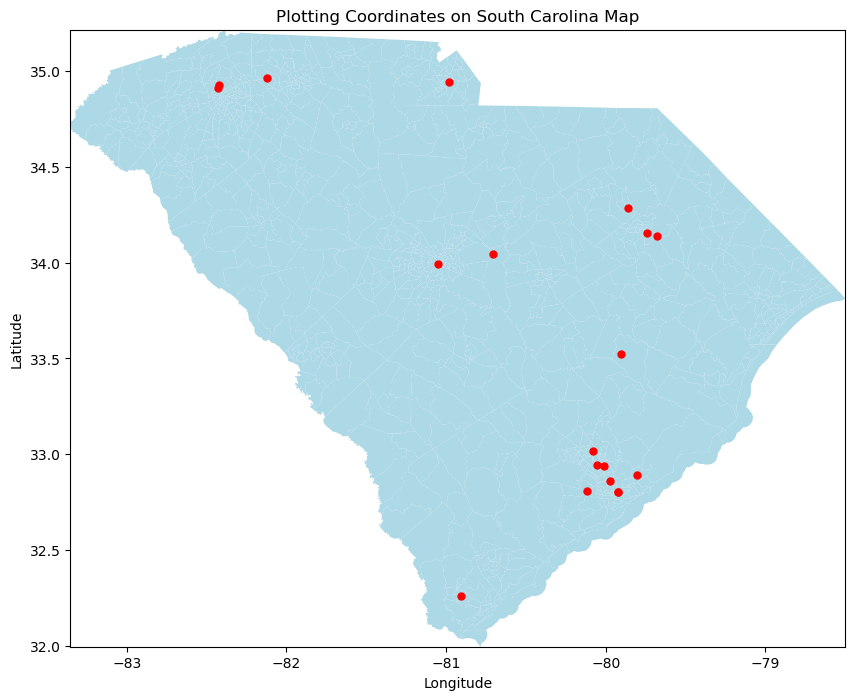

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

sc_map = gpd.read_file('tl_2019_45_tract.shp')

coordinates = [
    (34.961452, -82.118542),  # FORT PRINCE BLVD
    (32.8064444, -80.1158419),  # BEES FERRY RD
    (33.535352, -83.92399),  # LONGCREEK DR
    (33.9950969, -81.0531019),  # GERVAIS ST
    (33.5205587, -79.9018805),  # BROOMSTRAW RD
    (34.1373866, -79.680629),  # CLAUSSEN ROAD
    (32.8585712, -79.9726013),  # SPRUILL AVE
    (32.9374965, -80.0085346),  # FOSTER CREEK ROAD
    (33.0169849, -80.0807041),  # CORPORATE PKWY
    (32.9432729, -80.0528925),  # I-26
    (32.8900554, -79.8020865),  # PARK WEST BLVD
    (32.8040026, -79.922684),  # US HWY 17
    (34.912858, -82.426802),  # POINSETT HWY
    (32.8040026, -79.922684),  # US HWY 17
    (34.155276, -79.743477),  # PAMPLICO HWY
    (32.2629784, -80.9074662),  # BUCKWALTER PKWY
    (34.924249, -82.420514),  # PATROL CLUB RD
    (34.9410801, -80.9795306),  # DAVE LYLE BLVD
    (34.2832878, -79.8619055),  # GOVERNOR WILLIAMS HWY
    (34.0462568, -80.7041104),  # MCCORDS FERRY RD
]

fig, ax = plt.subplots(figsize=(10, 10))
sc_map.plot(ax=ax, color='lightblue')

for lat, lon in coordinates:
    plt.plot(lon, lat, marker='o', color='red', markersize=5)

bounds = sc_map.bounds
ax.set_xlim([bounds.minx.min(), bounds.maxx.max()])
ax.set_ylim([bounds.miny.min(), bounds.maxy.max()])

ax.set_title('Plotting Coordinates on South Carolina Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()